In [1]:
import gseapy as gp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
deg_data = pd.read_csv("/home/ouyangkang/Learning/daily_work/chipseq/0701_Neutrophils_DEGs.csv")

In [3]:
deg_data

,BC_1,logFC,pvals,pvals_adj
0,SNHG5,1.738331,2.832570e-23,1.156406e-21
1,XIST,9.553772,3.603599e-14,1.009600e-12
2,RNA5SP54,3.809098,8.257274e-13,2.156297e-11
3,RNA5SP352,5.315609,5.859081e-05,8.692732e-04
4,RNA5SP290,5.197293,5.238979e-03,5.828639e-02
...,...,...,...,...
23837,RN7SK,-16.108746,1.407116e-225,6.709693e-222
23838,MALAT1,-161.070600,1.001408e-246,5.968894e-243
23839,MT-RNR2,-268.669920,4.689578e-248,3.726964e-244
23840,MT-RNR1,-83.664420,3.510358e-252,4.184698e-248


In [4]:
up_gene = deg_data[deg_data.logFC > 0]
down_gene = deg_data[deg_data.logFC < 0]

In [18]:
up_gene = up_gene.sort_values("pvals")
up_gene

,BC_1,logFC,pvals,pvals_adj
0,SNHG5,1.738331,2.832570e-23,1.156406e-21
1,XIST,9.553772,3.603599e-14,1.009600e-12
2,RNA5SP54,3.809098,8.257274e-13,2.156297e-11
3,RNA5SP352,5.315609,5.859081e-05,8.692732e-04
4,RNA5SP290,5.197293,5.238979e-03,5.828639e-02
...,...,...,...,...
2579,AC079760.1,0.064525,9.972152e-01,1.000000e+00
2581,RNU6-393P,0.064525,9.972152e-01,1.000000e+00
2580,P2RY2,0.064525,9.972152e-01,1.000000e+00
2578,ARL2-SNX15,0.064525,9.972152e-01,1.000000e+00


In [19]:
down_gene = down_gene.sort_values("pvals")
down_gene

,BC_1,logFC,pvals,pvals_adj
23841,RN7SL1,-61.743183,1.595432e-255,3.803830e-251
23840,MT-RNR1,-83.664420,3.510358e-252,4.184698e-248
23839,MT-RNR2,-268.669920,4.689578e-248,3.726964e-244
23838,MALAT1,-161.070600,1.001408e-246,5.968894e-243
23837,RN7SK,-16.108746,1.407116e-225,6.709693e-222
...,...,...,...,...
3987,AC024592.3,-0.199079,9.993891e-01,1.000000e+00
3989,ADSL,-0.597735,9.993891e-01,1.000000e+00
3985,HPGD,-0.137518,9.994175e-01,1.000000e+00
2683,COX7C,-0.599779,9.994743e-01,1.000000e+00


In [20]:
up_gene_list = up_gene.BC_1.tolist()[0:199]
down_gene_list = down_gene.BC_1.tolist()[0:199]

In [21]:
enr = gp.enrichr(gene_list=up_gene_list,
                 gene_sets=["GO_Biological_Process_2023"],
                 organism="human",
                 outdir=None)
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Regulation Of Lymphocyte Activation (GO:0051249),3/18,0.000709,0.257716,0,0,20.189796,146.405640,LCK;FCRL3;CRTAM
1,GO_Biological_Process_2023,Positive Regulation Of Lymphocyte Proliferatio...,5/74,0.000857,0.257716,0,0,7.370387,52.053618,CD40LG;CD6;FCRL3;BCL2;CD3E
2,GO_Biological_Process_2023,T Cell Activation (GO:0042110),6/111,0.000857,0.257716,0,0,5.831532,41.181688,LCK;CRTAM;SLAMF6;GATA3;CD3E;CD3D
3,GO_Biological_Process_2023,Positive Regulation Of Natural Killer Cell Med...,3/24,0.001683,0.307100,0,0,14.416910,92.080164,CRTAM;SH2D1B;SLAMF6
4,GO_Biological_Process_2023,Cytoplasmic Translation (GO:0002181),5/93,0.002375,0.307100,0,0,5.773489,34.888864,RPL22;RPL36;RPL13;RPL18;RPL39


In [22]:
enr.results.to_csv("Neutrophils_up_DEGs_GO.csv", index=None)

In [23]:
from gseapy import barplot, dotplot

ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=20,
              figsize=(6, 10)
              #color=['darkred', 'darkblue', "pink"] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

ValueError: Warning: No enrich terms when cutoff = 0.05

In [24]:
enr = gp.enrichr(gene_list=down_gene_list,
                 gene_sets=["GO_Biological_Process_2023"],
                 organism="human",
                 outdir=None)
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Regulation Of Adipose Tissue Development (GO:1...,5/11,4.081125e-08,0.000071,0,0,85.030069,1446.727784,NCOA1;NCOA2;SPI1;LCP1;SORL1
1,GO_Biological_Process_2023,Protein Phosphorylation (GO:0006468),18/500,2.805515e-06,0.002439,0,0,3.985947,50.956043,SRPK2;LYN;USP15;CAMK1D;DMPK;PRKCB;LIMK2;LRRK2;...
2,GO_Biological_Process_2023,Positive Regulation Of Programmed Cell Death (...,12/245,6.646778e-06,0.003853,0,0,5.389273,64.247559,RASSF2;DDX3X;BCL6;STK17B;LRRK2;LAPTM5;MNDA;CFL...
3,GO_Biological_Process_2023,Regulation Of Cellular Response To Insulin Sti...,3/6,1.898263e-05,0.007352,0,0,101.010204,1098.181562,NCOA1;NCOA2;ATP2B1
4,GO_Biological_Process_2023,Positive Regulation Of Intracellular Signal Tr...,17/525,2.113758e-05,0.007352,0,0,3.547428,38.186140,LYN;DDX3X;PRKCB;LAPTM5;PIK3CD;PTPRJ;IQGAP1;CFL...


In [25]:
enr.results.to_csv("Neutrophils_down_DEGs_GO.csv", index=None)

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


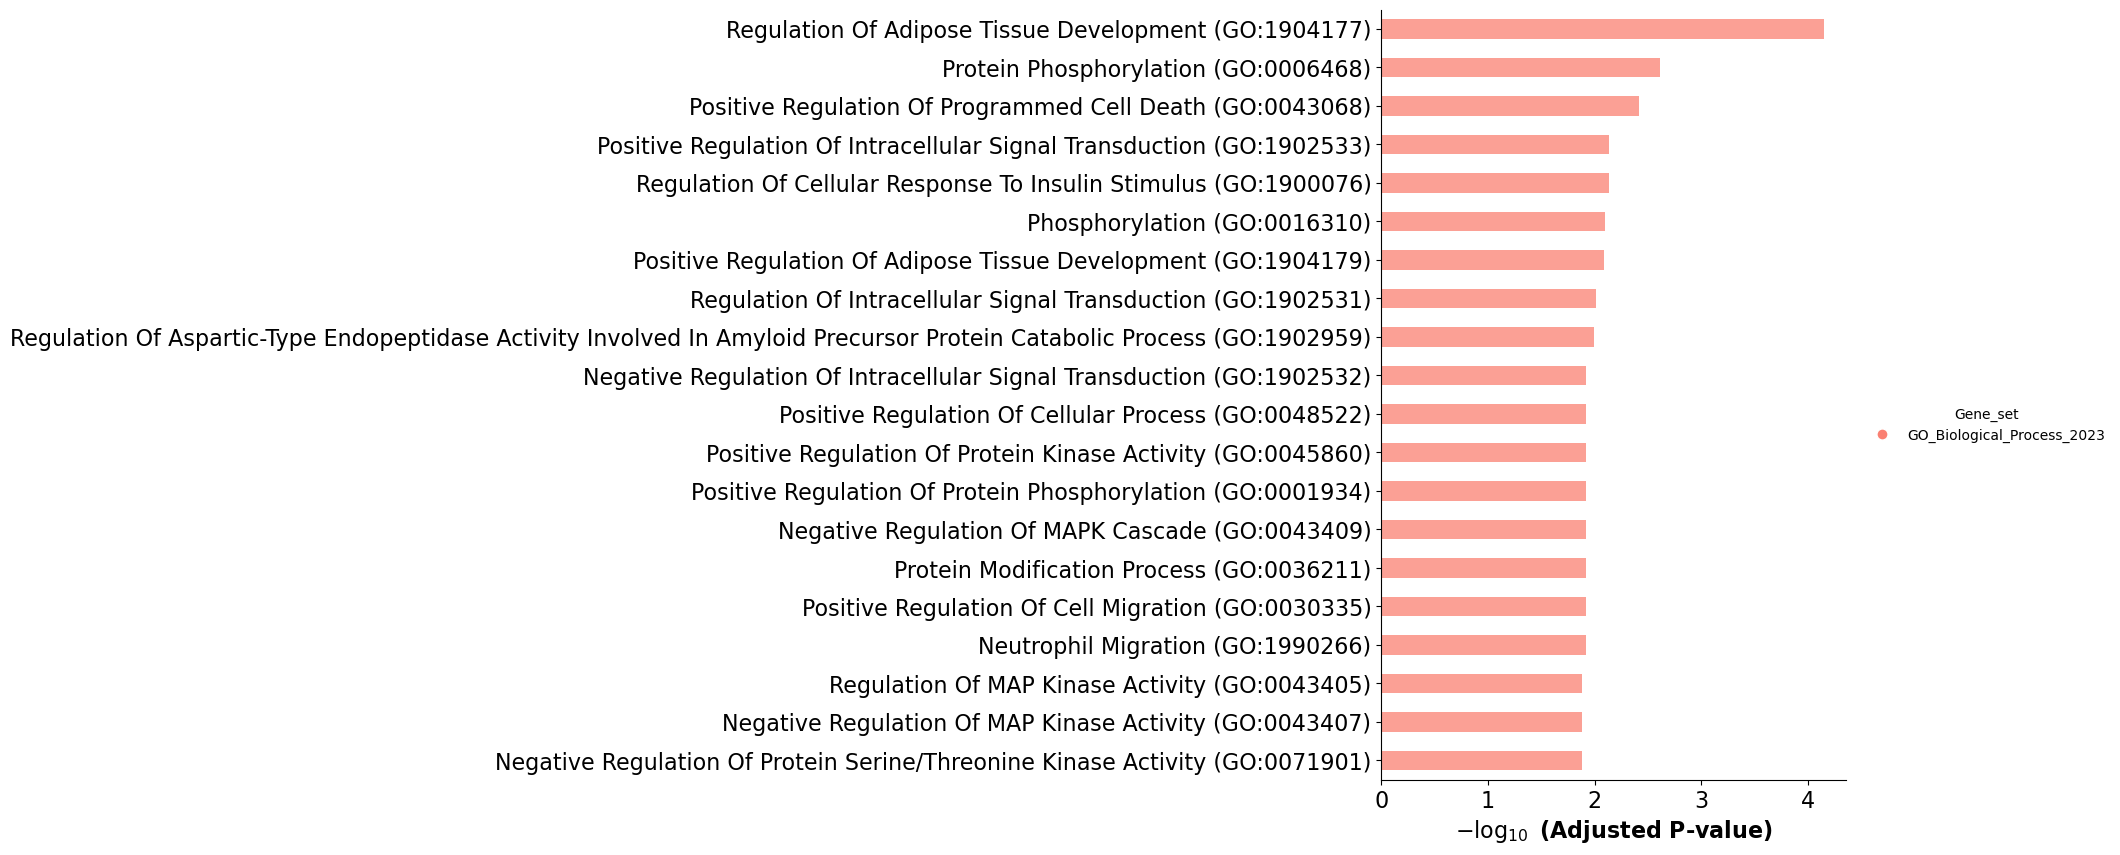

In [26]:
from gseapy import barplot, dotplot

ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=20,
              figsize=(6, 10)
              #color=['darkred', 'darkblue', "pink"] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

In [27]:
deg_data = deg_data.sort_values("pvals")

In [28]:
deg_gene_list = deg_data.BC_1.tolist()[0:199]

In [29]:
enr = gp.enrichr(gene_list= deg_gene_list,
                 gene_sets=["GO_Biological_Process_2023"],
                 organism="human",
                 outdir=None)
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Regulation Of Adipose Tissue Development (GO:1...,5/11,4.081125e-08,0.000071,0,0,85.030069,1446.727784,NCOA1;NCOA2;SPI1;LCP1;SORL1
1,GO_Biological_Process_2023,Protein Phosphorylation (GO:0006468),18/500,2.805515e-06,0.002439,0,0,3.985947,50.956043,SRPK2;LYN;USP15;CAMK1D;DMPK;PRKCB;LIMK2;LRRK2;...
2,GO_Biological_Process_2023,Positive Regulation Of Programmed Cell Death (...,12/245,6.646778e-06,0.003853,0,0,5.389273,64.247559,RASSF2;DDX3X;BCL6;STK17B;LRRK2;LAPTM5;MNDA;CFL...
3,GO_Biological_Process_2023,Regulation Of Cellular Response To Insulin Sti...,3/6,1.898263e-05,0.007352,0,0,101.010204,1098.181562,NCOA1;NCOA2;ATP2B1
4,GO_Biological_Process_2023,Positive Regulation Of Intracellular Signal Tr...,17/525,2.113758e-05,0.007352,0,0,3.547428,38.186140,LYN;DDX3X;PRKCB;LAPTM5;PIK3CD;PTPRJ;IQGAP1;CFL...


/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


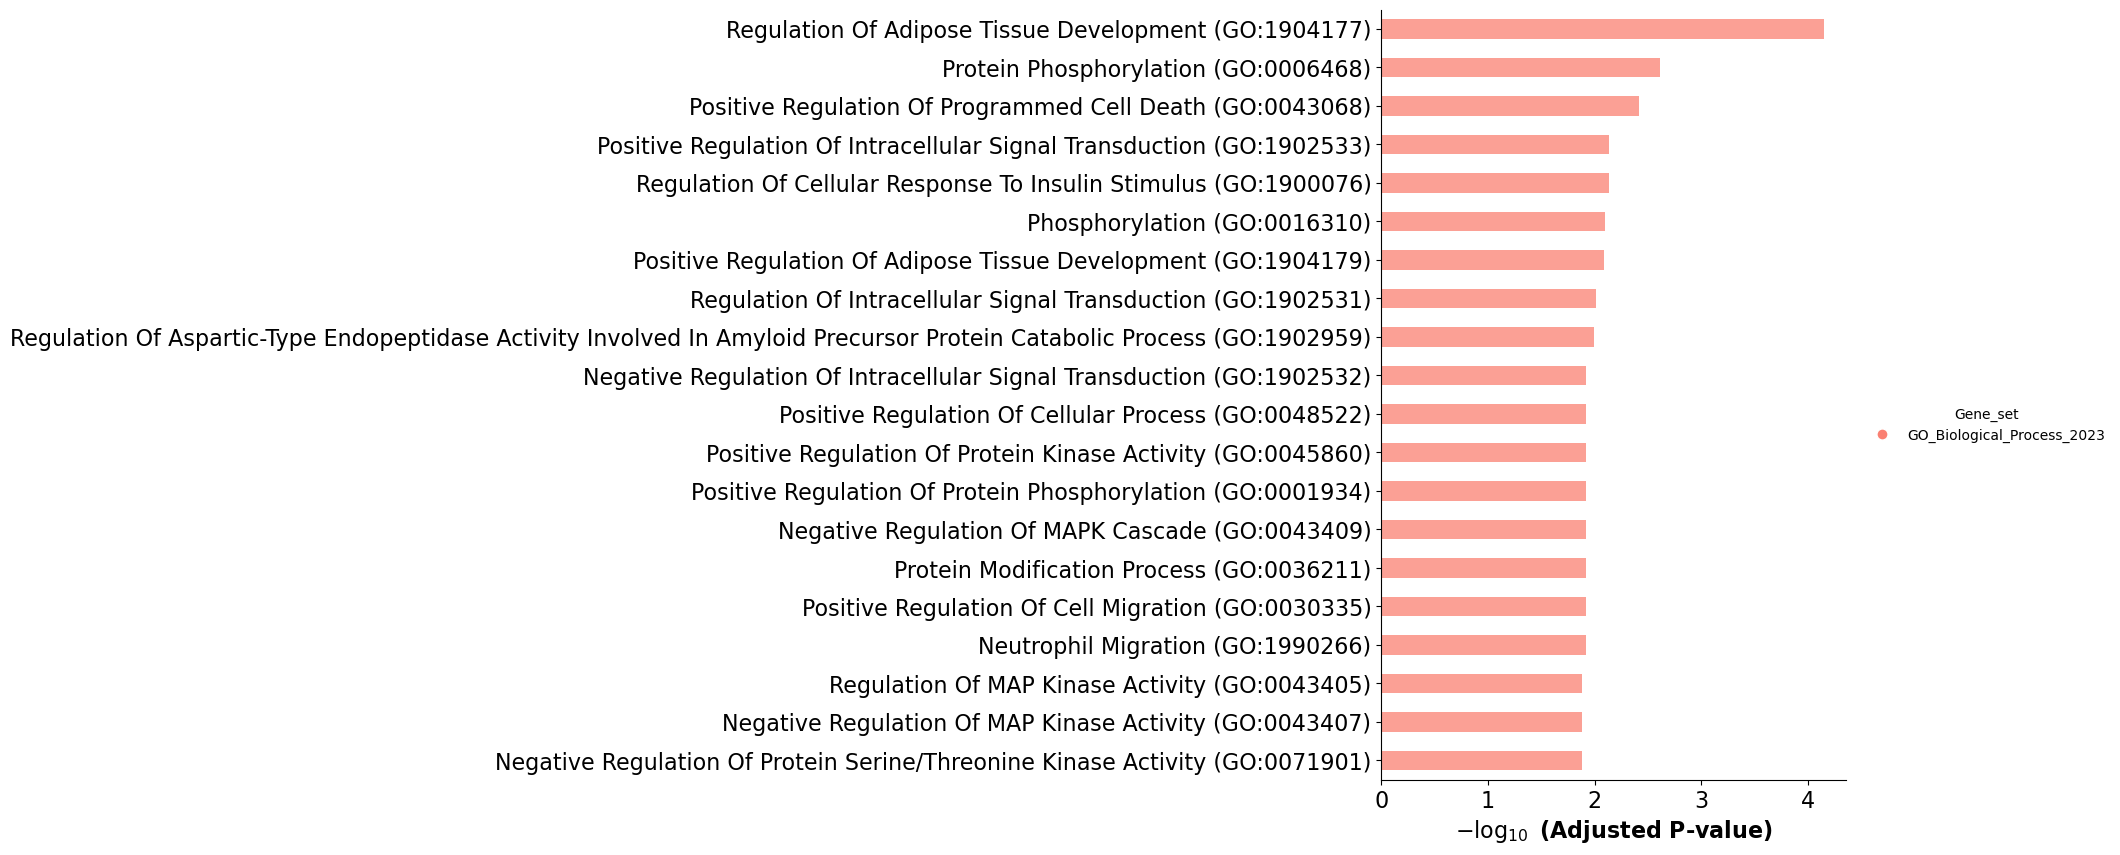

In [30]:
from gseapy import barplot, dotplot

ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=20,
              figsize=(6, 10)
              #color=['darkred', 'darkblue', "pink"] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )